# PART 03. 통계분석

## 6장. 회귀분석

In [58]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

### 단순선형회귀분석

#### 1. 데이터 파악

In [31]:
# 데이터프레임 생성

df_cars93 = pd.read_csv( 'C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/Cars93.csv',
                         index_col = 'Unnamed: 0' ) 

In [33]:
# x = df_cars93.drop('Price', axis = 1)
x = pd.DataFrame( df_cars93['EngineSize'] )
y = pd.DataFrame( df_cars93['Price'] )
display(x, y)

,EngineSize
1,1.8
2,3.2
3,2.8
4,2.8
5,3.5
...,...
89,2.5
90,2.0
91,2.8
92,2.3


,Price
1,15.9
2,33.9
3,29.1
4,37.7
5,30.0
...,...
89,19.7
90,20.0
91,23.3
92,22.7


#### 2. Train set / Test set 나누기

In [47]:
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 0.3,
                                                     random_state = 2000 )

#### 3. 선형회귀 모델 구축
- statsmodels 의 OLS를 사용하여 선형회귀분석 시행 ( OLS : Ordinary Least Squares )
- OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2, ...)를 구하는 방법
- 모델 선언: model = sm.OLS( y데이터, x데이터 )
- 모델 학습: model_trained = model.fit()

##### 3.1. 선형회귀 모델의 가정 확인

In [48]:
x_train = sm.add_constant(x_train)
model = sm.OLS( y_train, x_train, axis = 1 )
model_trained = model.fit()

##### 3.1.1. 확률오차의 정규성 확인

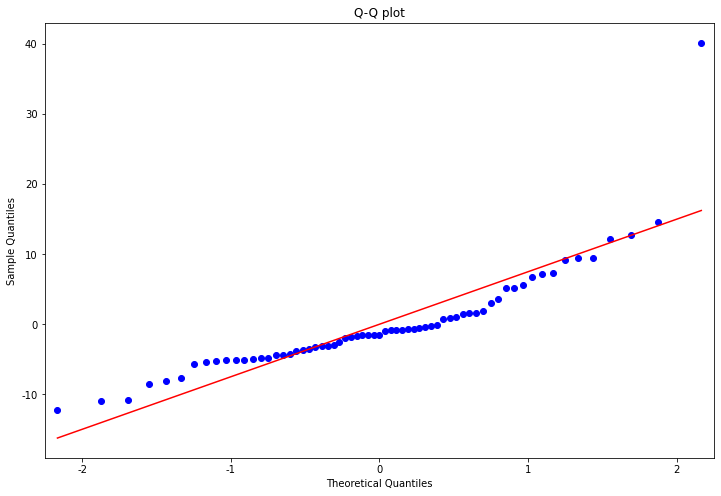

In [40]:
model_residuals = model_trained.resid

plt.rcParams[ 'axes.unicode_minus' ] = False   # 음수 폰트 깨짐을 방지
fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line = 's', color = 'blue', ax = ax)
ax.title.set_text('Q-Q plot')

#####  3.1.2. 확률오차의 등분산성 확인

[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

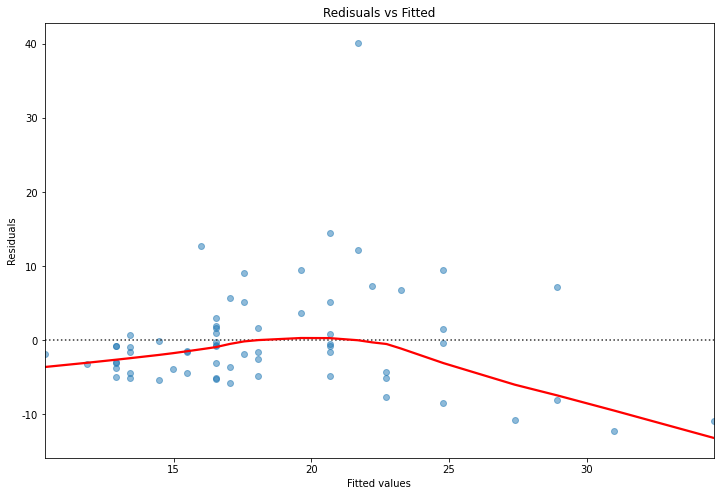

In [43]:
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(12)

sb.residplot( model_fitted_y, y_train,
              data = x_train,
              lowess = True,
              scatter_kws = {'alpha':0.5},
              line_kws = {'color':'red'},
              ax = ax )

ax.title.set_text('Redisuals vs Fitted')
ax.set(xlabel = 'Fitted values', ylabel = 'Residuals')

##### 3.2. 설명 : 통계적으로 해석
- 모형의 성능 : R-squared (결정계수; coefficient of determination) 
- coef(회귀계수): x가 한 단위 증가할 때 y의 변화량
- P>[t] (p-value): 유의수준 0.05 이하일 때 변수가 유의미

In [46]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     27.14
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.22e-06
Time:                        23:12:05   Log-Likelihood:                -223.19
No. Observations:                  65   AIC:                             450.4
Df Residuals:                      63   BIC:                             454.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1391      2.741      1.875      0.0

##### 예측: 미래의 반응변수 값 예측

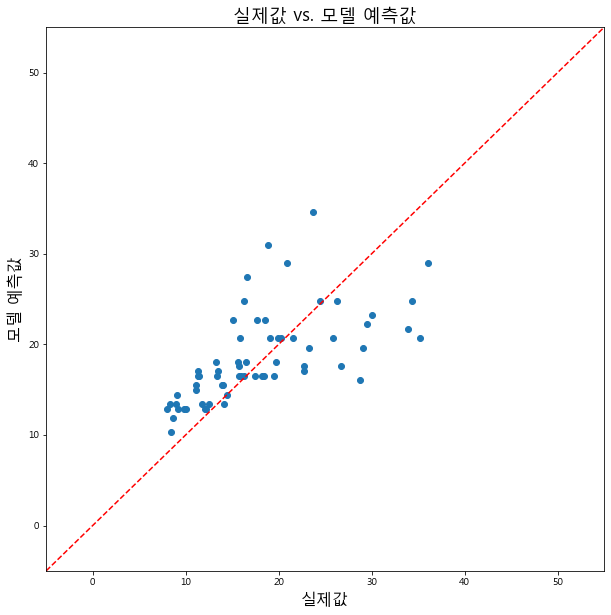

In [65]:
y_train_pred = model_trained.fittedvalues

plt.figure(figsize = (10,10))
plt.title('실제값 vs. 모델 예측값', size = 18)
plt.scatter(y_train, y_train_pred)
plt.plot( [-5,55], [-5,55], ls='--', c='red')
plt.xlabel('실제값', size=16)
plt.ylabel('모델 예측값', size = 16)
plt.xlim(-5,55)
plt.ylim(-5,55)

plt.show()

In [87]:
x_train, x_test, y_train, y_test = train_test_split( x, y,
                                                     test_size = 5 )

x_test = sm.add_constant(x_test)
y_test_pred = model_trained.predict(x_test)

x_test['Price_Pred'] = y_test_pred

x_test

,const,EngineSize,Price_Pred
3,1.0,2.8,19.628910
34,1.0,2.3,17.041441
28,1.0,3.0,20.663898
18,1.0,5.0,31.013774
53,1.0,1.6,13.418985


##### 결측치 확인

In [3]:
df_cars93.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

##### 탐색적 데이터 분석 (EDA; Exploratory Data Analysis)

In [4]:
df_cars93.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

##### 기술통계 살펴보기

In [5]:
# 중간값, 결측치, 왜도, 첨도 표시

df_stats = df_cars93.describe().T
df_stats

skew_results = []
kurtosis_results = []
null_results = []
median_results = []

# enumerate() 함수를 사용하여 인덱스와 데이터값을 쌍으로 사용하여 반복문 실행
for idx, val in enumerate( df_stats.index ):
    median_results.append( df_cars93[val].median() )
    skew_results.append( df_cars93[val].skew() )
    kurtosis_results.append( df_cars93[val].kurtosis() )
    null_results.append( df_cars93[val].isnull().sum() )  

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
Min.Price,93.0,17.125806,8.746029,6.7,10.8,14.7,20.3,45.4,14.7,0,1.182989,1.019419
Price,93.0,19.509677,9.659430,7.4,12.2,17.7,23.3,61.9,17.7,0,1.533082,3.429123
Max.Price,93.0,21.898925,11.030457,7.9,14.7,19.6,25.3,80.0,19.6,0,2.033859,7.439426
MPG.city,93.0,22.365591,5.619812,15.0,18.0,21.0,25.0,46.0,21.0,0,1.704430,4.004306
MPG.highway,93.0,29.086022,5.331726,20.0,26.0,28.0,31.0,50.0,28.0,0,1.229897,2.614201
EngineSize,93.0,2.667742,1.037363,1.0,1.8,2.4,3.3,5.7,2.4,0,0.859418,0.381025
Horsepower,93.0,143.827957,52.374410,55.0,103.0,140.0,170.0,300.0,140.0,0,0.951728,1.110883
RPM,93.0,5280.645161,596.731690,3800.0,4800.0,5200.0,5750.0,6500.0,5200.0,0,-0.258533,-0.409479
Rev.per.mile,93.0,2332.204301,496.506525,1320.0,1985.0,2340.0,2565.0,3755.0,2340.0,0,0.281546,0.220544
Fuel.tank.capacity,93.0,16.664516,3.279370,9.2,14.5,16.4,18.8,27.0,16.4,0,0.108146,0.127206


##### 종속변수(price)의 데이터 분포도 확인

<AxesSubplot:>

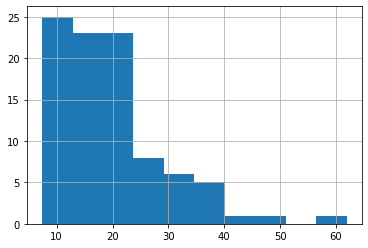

In [6]:
df_cars93['Price'].hist()

<AxesSubplot:>

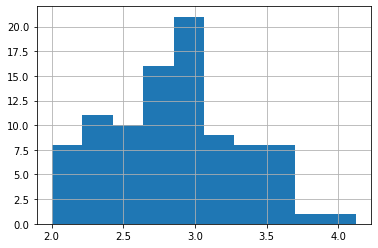

In [7]:
# 자연로그를 취해서 종속변수(Price)의 분포가 정규분포 형태를 띄는지 확인 --> 선형 회귀분석 시 자연로그 적용
np.log(df_cars93['Price']).hist()

In [8]:
np.log(df_cars93['Price']).skew()

0.2613736711371087

##### 데이터 타입 분류 - 데이터 전처리 필요 여부 확인

In [9]:
def separate_dtype(df):
    df_obj = df_cars93.select_dtypes(include=['object'])
    df_numr = df_cars93.select_dtypes(include=['int64', 'float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df_cars93)

In [ ]:
df_numr.head()

In [ ]:
df_obj.head()

#### 시각화

##### 히스토그램(Histogram)
- 각각의 독립변수 데이터의 분포를 확인

In [ ]:
df_cars93.hist(figsize=(22,18), density=True)
plt.show()

##### 산점도(Scatter plot)
- 종속변수(price)와 선형관계가 있을 것 같은 독립변수들을 몇개 추려서 산점도 그래프를 출력

In [ ]:
df_pairplot = df_cars93[['Price', 'EngineSize', 'Horsepower', 'Rev.per.mile', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Rear.seat.room', 'Luggage.room', 'Weight']]

sb.pairplot(df_pairplot)
plt.show()

In [ ]:
df_pairplot = df_cars93[['Price', 'EngineSize']]

sb.pairplot(df_pairplot)
plt.show()

##### 히트맵(Heatmap) - 상관관계 분석

In [ ]:
# 반대쪽 삼각형은 안보이게 설정
# fmt = 실제 값 표시 .2f 소수점 2째 자리

df_corr = df_cars93.corr()
cmap = sb.diverging_palette(240, 10, n=9, as_cmap=True)

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

sb.heatmap(df_cars93.corr(), annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt = '.2f', annot_kws={"size":10})

In [ ]:
# price와 상관관계가 높은 독립변수 선택

df_corr.sort_values(by='Price', ascending=False)[['Price']]

In [ ]:
plt.figure(figsize=(12,6))
ax1 = sb.distplot(df_cars93['Horsepower'], hist=True, norm_hist=False, kde=False, label="Horsepower", color = 'blue')

In [ ]:
plt.figure(figsize=(12,6))
ax2 = sb.distplot(df_cars93['Weight'], hist=True, norm_hist=False, kde=False, label="Weight", color = 'green')

In [ ]:
plt.figure(figsize=(12,6))
ax3 = sb.distplot(df_cars93['EngineSize'], hist=True, norm_hist=False, kde=False, label="EngineSize", color = 'red')

#### Regression 실시
- 독립변수(X): EngineSize
- 종속변수(y): Price

##### 시각화

In [ ]:
sb.jointplot(x='EngineSize', y='Price', data=df_cars93, kind='reg')
plt.show()

##### OLS model fit

In [ ]:
X = df_cars93[['EngineSize']]
y = df_cars93[['Price']]

# 상수항 추가하기 
X = sm.add_constant(X, has_constant="add")
X.head()

In [ ]:
# 모델 fit
model = sm.OLS(y, X)

result_model = model.fit()
result_model.summary()

In [ ]:
model

##### 잔차 확인
- 잔차(residual): 실제 타겟값과 모델을 통해 추정한 값의 차이

In [ ]:
# 잔차 확인
result_model.resid.plot()
plt.show()